In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score



In [7]:
# Load dataset
df = pd.read_csv("/content/club_participation.csv")

In [8]:
# Show all column names
print("Dataset columns:\n", df.columns)


Dataset columns:
 Index(['interest_level', 'free_hours_per_week', 'club_participation'], dtype='object')


In [9]:
# Try to automatically find target column (you can also hardcode this)
target_col = None
for col in df.columns:
    if any(word in col.lower() for word in ['join', 'participation', 'club']) and df[col].nunique() <= 2:
        target_col = col
        break

if not target_col:
    raise Exception("Could not automatically detect the target column. Please set 'target_col' manually.")

print(f"\nUsing target column: {target_col}")



Using target column: club_participation


In [10]:
# Encode categorical variables
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    if column != target_col:
        df[column] = le.fit_transform(df[column])



In [11]:
# Separate features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

In [12]:

# Encode target if it's categorical
if y.dtype == 'object':
    y = le.fit_transform(y)

In [15]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes of X_train, X_test, y_train, and y_test
print("Shapes of X_train, X_test, y_train, y_test:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

Shapes of X_train, X_test, y_train, y_test:
X_train: (80, 2), X_test: (20, 2)
y_train: (80,), y_test: (20,)


In [16]:
# Train a RandomForest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

In [17]:
# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.56      0.48         9
           1       0.50      0.36      0.42        11

    accuracy                           0.45        20
   macro avg       0.46      0.46      0.45        20
weighted avg       0.46      0.45      0.45        20

Accuracy: 0.45
Precision: 0.5
Recall: 0.36363636363636365


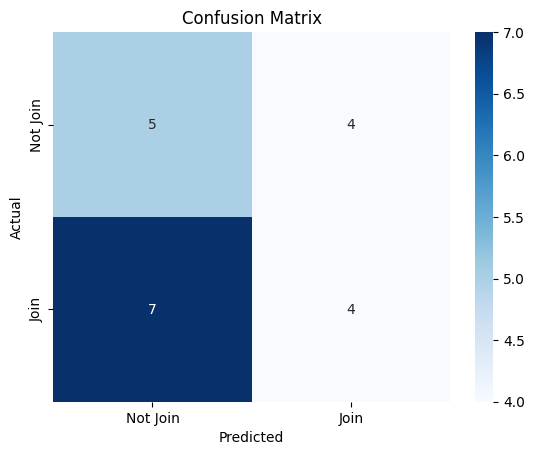

In [19]:
# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Join', 'Join'],
            yticklabels=['Not Join', 'Join'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()